In [1]:
import funcs as funcs

In [2]:
import pandas as pd
import numpy as np
import math
import sqlite3
conn = sqlite3.connect('database.db')
cur = conn.cursor()

In [87]:
events = pd.read_sql("""
    SELECT * 
    from nib;
    """, con=conn)
events

,Year,Decimal Day of Year,Date Time,TOD,TOY
0,1917,120.4792,04/30/1917 11:30:00 AM,0.4792,120.0
1,1918,131.3979,05/11/1918 09:33:00 AM,0.3979,131.0
2,1919,123.6063,05/03/1919 02:33:00 PM,0.6063,123.0
3,1920,132.4486,05/11/1920 10:46:00 AM,0.4486,132.0
4,1921,131.2792,05/11/1921 06:42:00 AM,0.2792,131.0
...,...,...,...,...,...
99,2016,114.6521,04/23/2016 03:39:00 PM,0.6521,114.0
100,2017,121.5000,05/01/2017 12:00:00 PM,0.5000,121.0
101,2018,121.5542,05/01/2018 01:18:00 PM,0.5542,121.0
102,2019,104.0146,04/14/2019 12:21:00 AM,0.0146,104.0


In [82]:
features = [ ]

AttributeError: 'numpy.ndarray' object has no attribute 'year'

In [89]:
dailies = pd.read_sql("""
    SELECT * 
    from daily_climate
    inner join nib using(Year);
    """, con=conn)
dailies

,short_day,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyWindSpeed,HourlyWindDirection,Year,Decimal Day of Year,Date Time,TOD,TOY
0,2013-01-01 00:00:00,29.340833,16.333333,30.625000,55.625000,NaN,NaN,2013,140.6118,05/20/2013 02:41:00 PM,0.6118,140.0
1,2013-01-02 00:00:00,29.359167,2.958333,8.416667,78.625000,NaN,NaN,2013,140.6118,05/20/2013 02:41:00 PM,0.6118,140.0
2,2013-01-03 00:00:00,29.560417,13.375000,27.916667,54.541667,NaN,NaN,2013,140.6118,05/20/2013 02:41:00 PM,0.6118,140.0
3,2013-01-04 00:00:00,29.714167,2.375000,10.958333,69.375000,NaN,NaN,2013,140.6118,05/20/2013 02:41:00 PM,0.6118,140.0
4,2013-01-05 00:00:00,29.543333,4.875000,16.416667,60.958333,NaN,NaN,2013,140.6118,05/20/2013 02:41:00 PM,0.6118,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14669,1982-12-27 00:00:00,30.000000,5.333333,14.000000,69.000000,11.333333,166.666667,1982,130.7333,05/10/1982 05:36:00 PM,0.7333,130.0
14670,1982-12-28 00:00:00,30.000000,13.000000,18.000000,81.000000,89.000000,330.000000,1982,130.7333,05/10/1982 05:36:00 PM,0.7333,130.0
14671,1982-12-29 00:00:00,30.000000,24.400000,39.000000,57.000000,3.600000,125.000000,1982,130.7333,05/10/1982 05:36:00 PM,0.7333,130.0
14672,1982-12-30 00:00:00,30.174583,27.250000,30.166667,89.333333,3.166667,152.500000,1982,130.7333,05/10/1982 05:36:00 PM,0.7333,130.0


In [90]:
[(f, len(dailies[dailies[f].isnull()])) for f in dailies.columns]

[('short_day', 0),
 ('HourlyAltimeterSetting', 0),
 ('HourlyDewPointTemperature', 0),
 ('HourlyDryBulbTemperature', 0),
 ('HourlyRelativeHumidity', 3247),
 ('HourlyWindSpeed', 6156),
 ('HourlyWindDirection', 8472),
 ('Year', 0),
 ('Decimal Day of Year', 0),
 ('Date Time', 0),
 ('TOD', 0),
 ('TOY', 0)]

In [95]:
dailies['TOY']

0        140.0
1        140.0
2        140.0
3        140.0
4        140.0
         ...  
14669    130.0
14670    130.0
14671    130.0
14672    130.0
14673    130.0
Name: TOY, Length: 14674, dtype: float64

In [181]:
dataset1= dailies.drop(['short_day', 'HourlyWindSpeed','HourlyWindDirection', 'HourlyRelativeHumidity', 'Year', 'Decimal Day of Year', 'Date Time',
       'TOD'],axis=1)

In [214]:
features=dataset1.drop(['TOY', 'HourlyDewPointTemperature'], axis=1)

In [215]:
features

,HourlyAltimeterSetting,HourlyDryBulbTemperature
0,29.340833,30.625000
1,29.359167,8.416667
2,29.560417,27.916667
3,29.714167,10.958333
4,29.543333,16.416667
...,...,...
14669,30.000000,14.000000
14670,30.000000,18.000000
14671,30.000000,39.000000
14672,30.174583,30.166667


In [216]:
labels = dataset1['TOY']

In [217]:
from sklearn.linear_model import GaussianNB
from sklearn.model_selection import train_test_split

ImportError: cannot import name 'GaussianNB' from 'sklearn.linear_model' (/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/__init__.py)

In [218]:
import seaborn as sns; sns.set()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


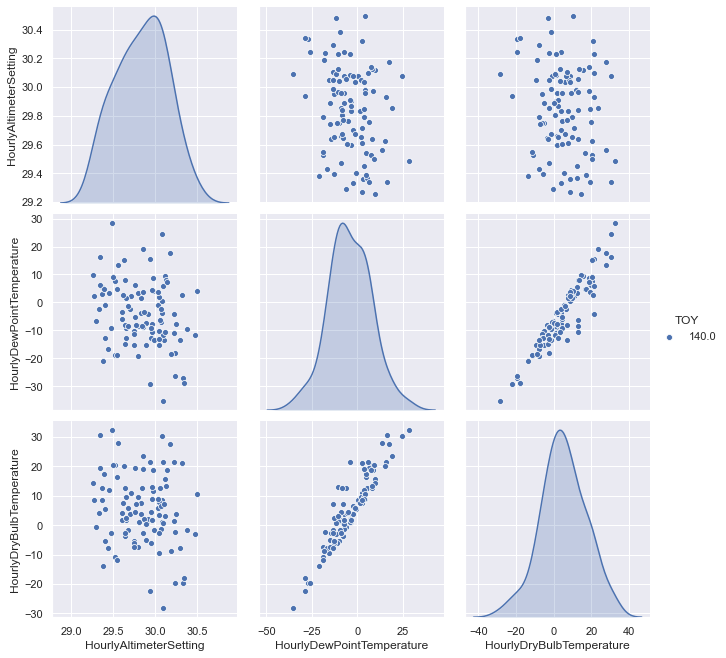

In [219]:
sns.pairplot(feat_mat[:100], hue='TOY',size=3)

In [220]:
model = LinearRegression(fit_intercept =True)
model.fit(feat_mat, labels)
Xtrain, Xtest, ytrain, ytest= train_test_split(feat_mat, labels)
y_fit = model.predict(Xtest)

In [221]:
import matplotlib.pyplot as plt


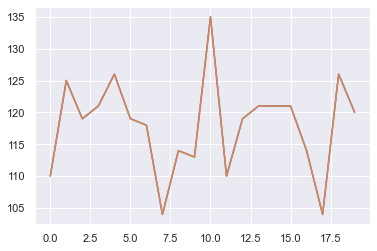

In [222]:
plt.plot(y_fit[:20])
plt.plot(ytest.values[:20])

In [228]:
Xtrain, Xtest, ytrain, ytest= train_test_split(features, labels)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,ytrain)

GaussianNB()

In [229]:
y_fit = model.predict(Xtest)

In [230]:
ytest

406      115.0
6477     113.0
13894    120.0
14364    130.0
14584    130.0
         ...  
4511     127.0
149      140.0
6398     113.0
3167     115.0
629      115.0
Name: TOY, Length: 3669, dtype: float64

In [231]:
y_fit

array([118., 121., 120., ..., 121., 121., 120.])

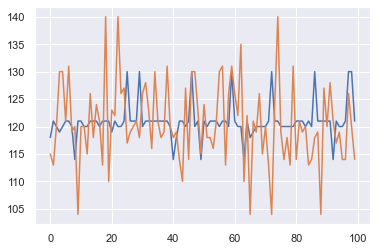

In [232]:
plt.plot(y_fit[:100])
plt.plot(ytest.values[:100])